In [1]:
### APO Minimization and Equilibration test ###

In [1]:
# imports
from SBLMDCOVDOCK import SBLSettings
from SBLMDCOVDOCK.md_setuptools import plot_xvg

settings = SBLSettings.GROMACS_Settings()

import pandas as pd
import os

import gmxapi as gmx
import subprocess
import matplotlib.pyplot as plt
#collect APO structures 

# AMPC - https://journals.asm.org/doi/10.1128/AAC.02073-20
ampc = "6T3D"
# KPC-2 - BLDB: http://dx.doi.org/10.1021/ACS.JMEDCHEM.7B00158
kpc2 = "5UL8"
# OXA-10 - BLDB: https://www.pnas.org/doi/full/10.1073/pnas.241442898
oxa10 = "1K55"

structures = pd.DataFrame({"PDBID": [ampc, kpc2, oxa10], 
                           "Name": ["AmpC", "KPC2", "OXA10"]})
settings.structures_output = os.path.join(settings.structures_output, 'amber14')
print(settings.structures_output)

prod_structures/APO/amber14


In [2]:
!ls amber14sb.ff

aminoacids.arn	  atomtypes.atp    forcefield.doc  rna.hdb	tip4p.itp
aminoacids.c.tdb  dna.arn	   forcefield.itp  rna.r2b	tip5p.itp
aminoacids.hdb	  dna.hdb	   gbsa.itp	   rna.rtp	urea.itp
aminoacids.n.tdb  dna.r2b	   ions.itp	   spce.itp	watermodels.dat
aminoacids.r2b	  dna.rtp	   Makefile.am	   spc.itp
aminoacids.rtp	  ffbonded.itp	   Makefile.in	   tip3p.itp
aminoacids.vsd	  ffnonbonded.itp  rna.arn	   tip4pew.itp


In [3]:
amber14sb_ff_path = os.path.join(os.getcwd())

# Set the GMXLIB environment variable
os.environ["GMXLIB"] = amber14sb_ff_path

In [4]:
# Create Box, Solvate, add Ions
for pdbcode in structures.PDBID:
    break # tested working 
    print(pdbcode)  
    # Input path
    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + ".gro")
    
    # Output paths
    box_output_path = input_path.replace(".gro", "_box.pdb")

    # Define the editconf command
    editconf_command = ["gmx", "editconf", "-f", input_path, "-o", box_output_path, "-c", "-d", "1.0", "-bt", "cubic"]

    # Run the editconf command
    subprocess.run(editconf_command, check=True) 
    # subprocess.run(editconf_command.replace(".pdb",".gro"), check=True) 


    solvated_output_path = input_path.replace(".gro", "_solv.gro")

    topo_path = input_path.replace(".gro", ".top")

    # Define the solvate command
    solvate_command = ["gmx", "solvate", "-cp", box_output_path, "-cs", "spc216.gro", "-p", topo_path, "-o", solvated_output_path]

    # Run the solvate command
    subprocess.run(solvate_command, check=True)

    ion_MDP = os.path.join(settings.config, "ions.mdp")
    # Generate tpr for genion
    grompp_command = ["gmx", "grompp", "-f", ion_MDP, "-c", solvated_output_path, "-p", topo_path, "-o", solvated_output_path.replace(".gro", ".tpr")]

    # Run the grompp command
    subprocess.run(grompp_command, check=True)

    ionised_output_path = solvated_output_path.replace(".gro", "_ion.gro")

    # Define the genion command
    genion_command = ["gmx", "genion", "-s", solvated_output_path.replace(".gro", ".tpr"), "-o", ionised_output_path, "-p", topo_path, "-pname", "NA", "-nname", "CL", "-neutral", "-conc", "0.15"]

    # Run the genion command
    subprocess.run(genion_command, input='SOL\n', check=True, text=True)

    # break


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/minim.mdp -c prod_structures/APO/amber14/APO_6T3D_solv_ion.gro -p prod_structures/APO/amber14/APO_6T3D.top -o prod_structures/APO/amber14/APO_6T3D_min.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file config/minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group rest is 165195.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_min.tpr to prod_structures/APO/amber14/#APO_6T3D_min.tpr.1#

GROMACS reminds you: "If You Touch Me, 

Setting the LD random seed to 1002422187

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   358    Protein residues
There are: 24668      Water residues
There are:   149        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.416 nm between atom 5203 and 5211
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 80x80x80, spacing 0.116 0.116 0.116

Estimate for the relative computational load of the PME mesh part: 0.26

This run will generate roughly 6 Mb of data



Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_min.trr to prod_structures/APO/amber14/#APO_6T3D_min.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_min.edr to prod_structures/APO/amber14/#APO_6T3D_min.edr.1#

Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000
Step=    0, Dmax= 1.0e-02 nm, Epot= -8.30285e+05 Fmax= 1.94776e+05, atom= 4097
Step=    1, Dmax= 1.0e-02 nm, Epot= -8.62845e+05 Fmax= 6.85261e+04, atom= 29012
Step=    2, Dmax= 1.2e-02 nm, Epot= -9.05597e+05 Fmax= 2.65416e+04, atom= 29012
Step=    3, Dmax= 1.4e-02 nm, Epot= -9.54074e+05 Fmax= 1.07347e+04, atom= 42503
Step=    4, Dmax= 1.7e-02 nm, Epot= -9.98227e+05 Fmax= 4.78744e+03, atom= 42503
Step=    5, Dmax= 2.1e-02 nm, Epot= -1.03022e+06 Fmax= 1.76037e+04, atom= 4095
Step=    6, Dmax= 2.5e-02 nm, Epot= -1.04644e+06 Fmax= 1.94265e+04, atom= 3739
Step=    7, Dmax= 3.0e-02 nm, Epot= -1.05366e+06 Fmax= 2.55481e+04, atom= 3739
Step=    8, Dmax= 3.


Statistics over 1003 steps [ 0.0000 through 1002.0000 ps ], 1 data sets
All statistics are over 794 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                -1.24158e+06      19000    47735.4    -124554  (kJ/mol)


Opened prod_structures/APO/amber14/APO_6T3D_min.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY          20  Vir-ZZ        
 21  Pres-XX         22  Pres-XY         23  Pres-XZ         24  Pres-YX       
 25  Pres-YY         26  Pres-YZ         27  Pres-ZX         28  Pres-ZY       
 29  Pres-ZZ         30  #Surf*SurfTen   31  T-rest        


Back Off! I just backed up prod_structures/APO/amber14/

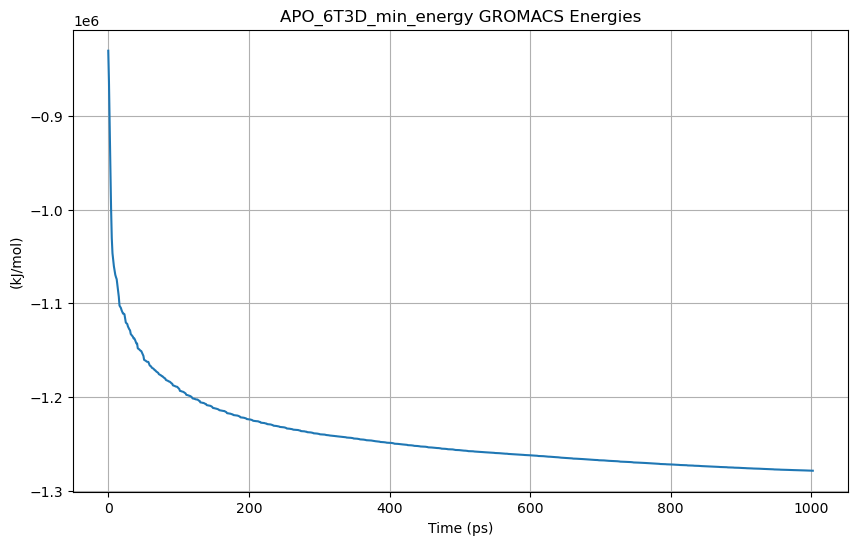

                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/minim.mdp -c prod_structures/APO/amber14/APO_5UL8_solv_ion.gro -p prod_structures/APO/amber14/APO_5UL8.top -o prod_structures/APO/amber14/APO_5UL8_min.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file config/minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group rest is 114120.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_min.tpr to prod_structures/APO/amber14/#APO_5UL8_min.tpr.1#

GROMACS reminds you: "A curious aspect 

Setting the LD random seed to -135792114

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   271    Protein residues
There are: 16952      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.422 nm between atom 679 and 680
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 72x72x72, spacing 0.114 0.114 0.114

Estimate for the relative computational load of the PME mesh part: 0.26

This run will generate roughly 4 Mb of data



Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_min.trr to prod_structures/APO/amber14/#APO_5UL8_min.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_min.edr to prod_structures/APO/amber14/#APO_5UL8_min.edr.1#

Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000
Step=    0, Dmax= 1.0e-02 nm, Epot= -3.16477e+05 Fmax= 2.02320e+05, atom= 33192
Step=    1, Dmax= 1.0e-02 nm, Epot= -3.89825e+05 Fmax= 8.62502e+04, atom= 54964
Step=    2, Dmax= 1.2e-02 nm, Epot= -4.62719e+05 Fmax= 3.85377e+04, atom= 44826
Step=    3, Dmax= 1.4e-02 nm, Epot= -5.26631e+05 Fmax= 1.90503e+04, atom= 44826
Step=    4, Dmax= 1.7e-02 nm, Epot= -5.79854e+05 Fmax= 8.82683e+03, atom= 44826
Step=    5, Dmax= 2.1e-02 nm, Epot= -6.28585e+05 Fmax= 4.36035e+03, atom= 44622
Step=    6, Dmax= 2.5e-02 nm, Epot= -6.64540e+05 Fmax= 1.63745e+04, atom= 1343
Step=    7, Dmax= 3.0e-02 nm, Epot= -6.70888e+05 Fmax= 2.19997e+04, atom= 1472
Step=    8, Dmax= 


Statistics over 1052 steps [ 0.0000 through 1051.0000 ps ], 1 data sets
All statistics are over 833 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -842807      17000    46015.1    -109469  (kJ/mol)



Steepest Descents converged to Fmax < 1000 in 1052 steps
Potential Energy  = -8.7510325e+05
Maximum force     =  9.3533630e+02 on atom 3312
Norm of force     =  1.8039940e+01

GROMACS reminds you: "If it's all right with Dirac, it's all right with me." (Enrico Fermi, on being told that there was experimental evidence He-3 nuclei obey Fermi-Dirac statistics.)

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/amber14/APO_5UL8_min.edr -o prod_structures/APO/amber14/APO_5UL8_min_energy.xvg

Opened prod_structures/APO/amber14/APO_5UL8_min.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
------------------------------------------------------------------

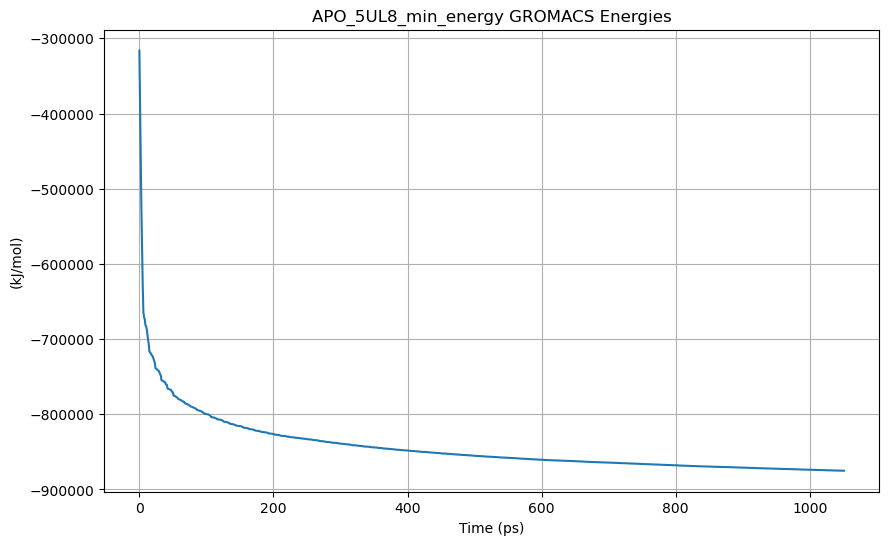

                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/minim.mdp -c prod_structures/APO/amber14/APO_1K55_solv_ion.gro -p prod_structures/APO/amber14/APO_1K55.top -o prod_structures/APO/amber14/APO_1K55_min.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file config/minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group rest is 98205.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_min.tpr to prod_structures/APO/amber14/#APO_1K55_min.tpr.1#

GROMACS reminds you: "If it's all right 

Setting the LD random seed to -1204356

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   245    Protein residues
There are: 14389      Water residues
There are:    88        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.421 nm between atom 3762 and 3770
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 72x72x72, spacing 0.108 0.108 0.108

Estimate for the relative computational load of the PME mesh part: 0.27

This run will generate roughly 4 Mb of data



Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_min.trr to prod_structures/APO/amber14/#APO_1K55_min.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_min.edr to prod_structures/APO/amber14/#APO_1K55_min.edr.1#

Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000
Step=    0, Dmax= 1.0e-02 nm, Epot= -2.59629e+05 Fmax= 3.32535e+05, atom= 47122
Step=    1, Dmax= 1.0e-02 nm, Epot= -2.94270e+05 Fmax= 1.50187e+05, atom= 47122
Step=    2, Dmax= 1.2e-02 nm, Epot= -3.42058e+05 Fmax= 6.65456e+04, atom= 47122
Step=    3, Dmax= 1.4e-02 nm, Epot= -4.01020e+05 Fmax= 2.92100e+04, atom= 47122
Step=    4, Dmax= 1.7e-02 nm, Epot= -4.60973e+05 Fmax= 1.21858e+04, atom= 47122
Step=    5, Dmax= 2.1e-02 nm, Epot= -5.11933e+05 Fmax= 5.33820e+03, atom= 20857
Step=    6, Dmax= 2.5e-02 nm, Epot= -5.48370e+05 Fmax= 2.33739e+04, atom= 3138
Step=    7, Dmax= 3.0e-02 nm, Epot= -5.62030e+05 Fmax= 1.33872e+04, atom= 2785
Step=    8, Dmax= 


Statistics over 1166 steps [ 0.0000 through 1165.0000 ps ], 1 data sets
All statistics are over 923 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -716355      15000    41363.1   -98542.3  (kJ/mol)


Step= 1156, Dmax= 6.7e-03 nm, Epot= -7.44919e+05 Fmax= 1.43381e+03, atom= 2056
Step= 1157, Dmax= 8.0e-03 nm, Epot= -7.44927e+05 Fmax= 1.08562e+04, atom= 2056
Step= 1158, Dmax= 9.6e-03 nm, Epot= -7.44993e+05 Fmax= 3.92092e+03, atom= 2056
Step= 1160, Dmax= 5.8e-03 nm, Epot= -7.45007e+05 Fmax= 4.94038e+03, atom= 2056
Step= 1161, Dmax= 6.9e-03 nm, Epot= -7.45019e+05 Fmax= 5.70059e+03, atom= 2056
Step= 1162, Dmax= 8.3e-03 nm, Epot= -7.45028e+05 Fmax= 7.05847e+03, atom= 2056
Step= 1163, Dmax= 9.9e-03 nm, Epot= -7.45035e+05 Fmax= 8.25750e+03, atom= 2056
Step= 1165, Dmax= 6.0e-03 nm, Epot= -7.45083e+05 Fmax= 9.32126e+02, atom= 2056

writing lowest energy coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_min.gro to prod_structures/APO/amber14/#APO_1K55_min.gro.1#

Steepest Descents converged to Fmax < 1000 in 1166 steps
Potential Energy  = -7.4508300e+05
Maximum force     =  9.3212634e+02 on atom 2056
Norm of force     =  1.7188955e+01

GROMACS reminds you: "Love is 

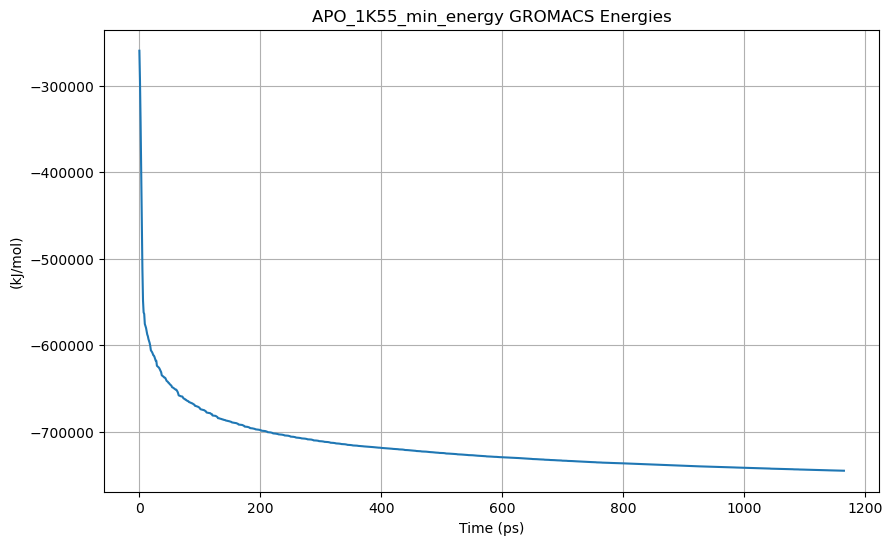

In [5]:
# Perform minimisation

for pdbcode in structures.PDBID:
    # break
    # prep minimisation
    min_mdp = os.path.join(settings.config, "minim.mdp")
    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_solv_ion.gro")
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.tpr")
    grompp_command = ["gmx", "grompp", "-f", min_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path]

    subprocess.run(grompp_command, check=True)

    # # Run minimization
    min_command = ["gmx", "mdrun", "-v", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(min_command, check=True)

    # Get energy
    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_energy.xvg")]
    subprocess.run(energy_command, input="10\n".encode(), check=True)
    plot_xvg(tpr_path.replace(".tpr","_energy.xvg"))

In [6]:
#Perform nvt equilibration of the apo protein

for pdbcode in structures.PDBID:
    nvt_mdp = os.path.join(settings.config, 'nvt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.tpr")

    grompp_command = ["gmx", "grompp", "-f", nvt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]
    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)


    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_temperature.xvg")]
    subprocess.run(energy_command, input="16\n".encode(), check=True)
    
    print("Done with " + pdbcode)


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/nvt.mdp -c prod_structures/APO/amber14/APO_6T3D_min.gro -p prod_structures/APO/amber14/APO_6T3D.top -o prod_structures/APO/amber14/APO_6T3D_nvt.tpr -r prod_structures/APO/amber14/APO_6T3D_min.gro

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group Protein is 13961.74
Number of degrees of freedom in T-Coupling group non-Protein is 148452.27

NOTE 1 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D

Setting the LD random seed to -67899407

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to -151601169

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   358    Protein residues
There are: 24668      Water residues
There are:   149        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.418 nm between atom 396 and 403

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm

Set rlist, 

Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_nvt.trr to prod_structures/APO/amber14/#APO_6T3D_nvt.trr.2#

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_nvt.edr to prod_structures/APO/amber14/#APO_6T3D_nvt.edr.2#
starting mdrun 'Generic title in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_nvt.gro to prod_structures/APO/amber14/#APO_6T3D_nvt.gro.2#

               Core t (s)   Wall t (s)        (%)
       Time:      997.245       49.864     1999.9
                 (ns/day)    (hour/ns)
Performance:  


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                  299.73       0.21    3.16483    1.37339  (K)
Done with 6T3D


Number of degrees of freedom in T-Coupling group Protein is 10093.73
Number of degrees of freedom in T-Coupling group non-Protein is 102018.27

NOTE 1 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_nvt.tpr to prod_structures/APO/amber14/#APO_5UL8_nvt.tpr.2#

GROMACS reminds you: "The scientist is not a person who gives the right answers, he's one who asks the right questions." (Claude Levi-Strauss)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx mdrun -deffnm prod_structures/APO/amber14/APO_5UL8_nvt


Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_nvt

Setting the LD random seed to -671097876

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to 787478882

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   271    Protein residues
There are: 16952      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.422 nm between atom 679 and 680

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm

Set rlist, 

Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_nvt.trr to prod_structures/APO/amber14/#APO_5UL8_nvt.trr.2#

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_nvt.edr to prod_structures/APO/amber14/#APO_5UL8_nvt.edr.2#
starting mdrun 'Generic title in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_nvt.gro to prod_structures/APO/amber14/#APO_5UL8_nvt.gro.2#

               Core t (s)   Wall t (s)        (%)
       Time:      716.829       35.843     1999.9
                 (ns/day)    (hour/ns)
Performance:  


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.717       0.13    3.09901   0.913324  (K)
Done with 5UL8


Number of degrees of freedom in T-Coupling group Protein is 9678.70
Number of degrees of freedom in T-Coupling group non-Protein is 86595.30

NOTE 1 [file config/nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_nvt.tpr to prod_structures/APO/amber14/#APO_1K55_nvt.tpr.2#

GROMACS reminds you: "Ease Myself Into the Body Bag" (P.J. Harvey)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx mdrun -deffnm prod_structures/APO/amber14/APO_1K55_nvt


Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_nvt.log to prod_structures/APO/amber14/#APO_1K55_nvt.log.2#
Reading file prod_str

Setting the LD random seed to -570432522

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to -553945409

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:   245    Protein residues
There are: 14389      Water residues
There are:    88        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.423 nm between atom 3443 and 3451

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.034 nm, buffer size 0.034 nm

Set rlis

Changing nstlist from 10 to 100, rlist from 1 to 1.155

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_nvt.trr to prod_structures/APO/amber14/#APO_1K55_nvt.trr.2#

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_nvt.edr to prod_structures/APO/amber14/#APO_1K55_nvt.edr.2#
starting mdrun 'Generic title in water'
50000 steps,    100.0 ps.



Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.847       0.16    3.13502   0.697935  (K)
Done with 1K55



Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_nvt.gro to prod_structures/APO/amber14/#APO_1K55_nvt.gro.1#

               Core t (s)   Wall t (s)        (%)
       Time:      655.149       32.760     1999.8
                 (ns/day)    (hour/ns)
Performance:      263.739        0.091

GROMACS reminds you: "Do not quench your inspiration and your imagination; do not become the slave of your model." (Vincent Van Gogh)

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/amber14/APO_1K55_nvt.edr -o prod_structures/APO/amber14/APO_1K55_nvt_temperature.xvg

Opened prod_structures/APO/amber14/APO_1K55_nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End y

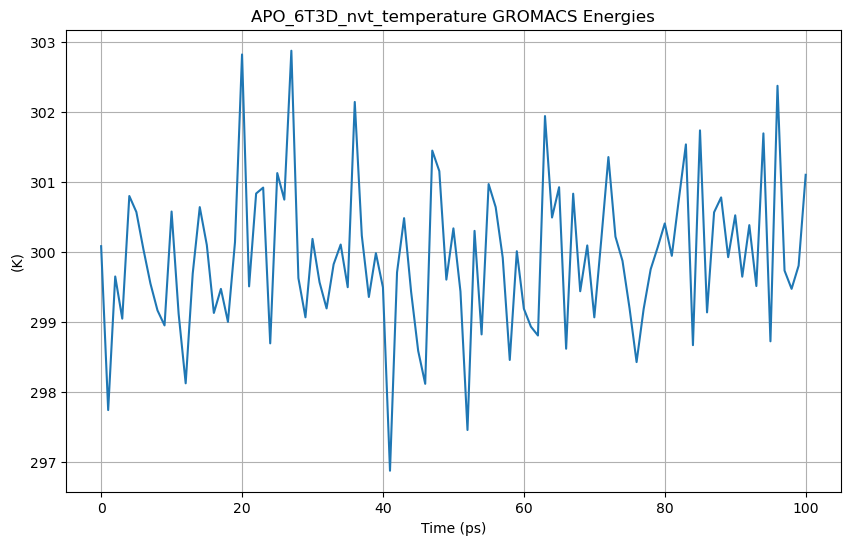

Done with 6T3D


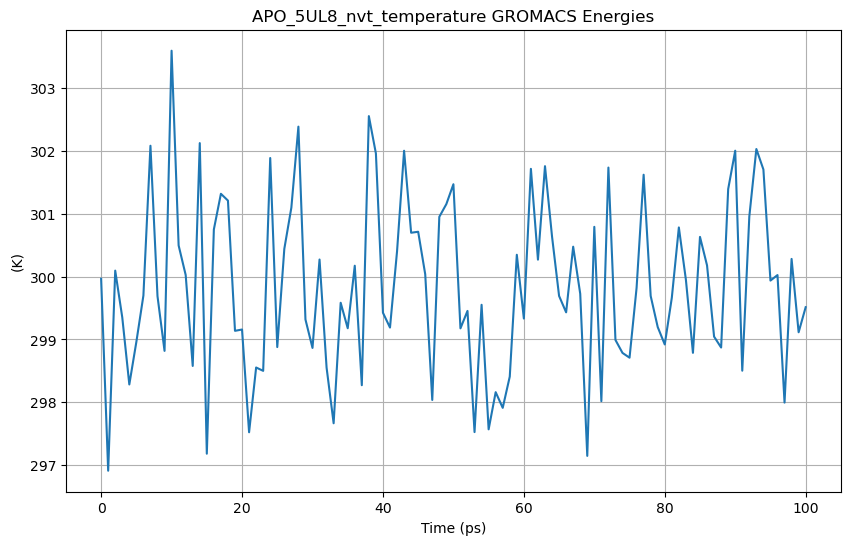

Done with 5UL8


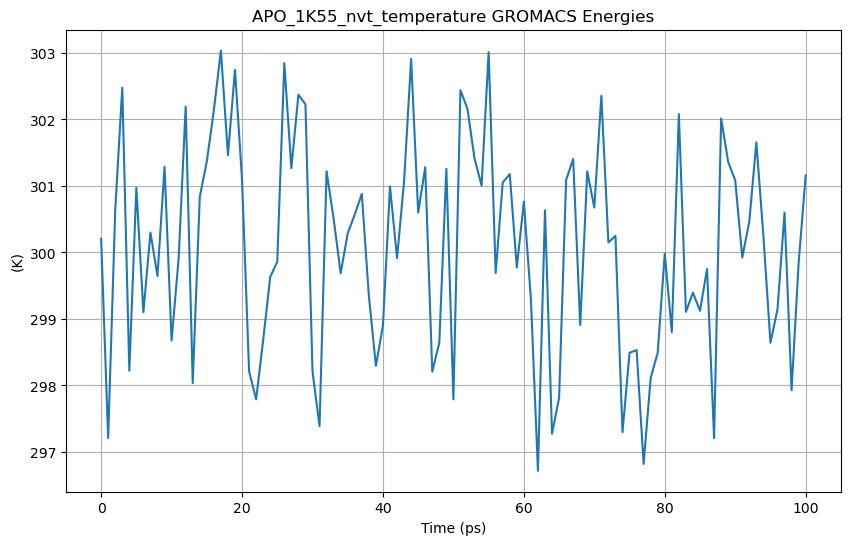

Done with 1K55


In [7]:
#Perform nvt equilibration of the apo protein

for pdbcode in structures.PDBID:
    nvt_mdp = os.path.join(settings.config, 'nvt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_min.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.tpr")

    # grompp_command = ["gmx", "grompp", "-f", nvt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]
    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    # subprocess.run(mdrun_command, check=True)


    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_temperature.xvg")]
    # subprocess.run(energy_command, input="16\n".encode(), check=True)
    plot_xvg(tpr_path.replace(".tpr","_temperature.xvg"))

    print("Done with " + pdbcode)


In [8]:
#Perform npt equilibration of the apo protein

for pdbcode in structures.PDBID:
    npt_mdp = os.path.join(settings.config, 'npt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.tpr")

    grompp_command = ["gmx", "grompp", "-f", npt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]

    subprocess.run(grompp_command, check=True)

    mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    subprocess.run(mdrun_command, check=True)

    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_pressure.xvg")]

    subprocess.run(energy_command, input="18\n".encode(), check=True)

    energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_density.xvg")]

    subprocess.run(energy_command, input="24\n".encode(), check=True)
    print("Done with " + pdbcode)


                      :-) GROMACS - gmx grompp, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx grompp -f config/npt.mdp -c prod_structures/APO/amber14/APO_6T3D_nvt.gro -p prod_structures/APO/amber14/APO_6T3D.top -o prod_structures/APO/amber14/APO_6T3D_npt.tpr -r prod_structures/APO/amber14/APO_6T3D_nvt.gro

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5



NOTE 1 [file APO_6T3D.top, line 61998]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.

Number of degrees of freedom in T-Coupling group Protein is 13961.74
Number of degrees of freedom in T-Coupling group non-Protein is 148452.27

NOTE 2 [file config/npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There were 2 NOTEs

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_npt.tpr to prod_structures/APO/amber14/#APO_6T3D_npt.tpr.1#

GROMACS reminds you: "It's an easy game, just don't let the ball past!" (Szilard Pall)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromac

Setting the LD random seed to 1652520295

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  4.663  4.664  4.659

The center of mass of the position restraint coord's is  4.663  4.664  4.659
Analysing residue names:
There are:   358    Protein residues
There are: 24668      Water residues
There are:   149        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.431 nm between atom 394 and 402

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 

Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_npt.trr to prod_structures/APO/amber14/#APO_6T3D_npt.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_npt.edr to prod_structures/APO/amber14/#APO_6T3D_npt.edr.1#
starting mdrun 'Generic title in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_6T3D_npt.gro to prod_structures/APO/amber14/#APO_6T3D_npt.gro.1#

               Core t (s)   Wall t (s)        (%)
       Time:     1001.825       50.093     1999.9
                 (ns/day)    (hour/ns)
Performance:  


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    2.57478          2    119.418    2.45269  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1015.82       0.24    3.60067   0.811671  (kg/m^3)
Done with 6T3D



NOTE 1 [file APO_5UL8.top, line 44621]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.

Number of degrees of freedom in T-Coupling group Protein is 10093.73
Number of degrees of freedom in T-Coupling group non-Protein is 102018.27

NOTE 2 [file config/npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There were 2 NOTEs

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_npt.tpr to prod_structures/APO/amber14/#APO_5UL8_npt.tpr.1#

GROMACS reminds you: "Just Give Me a Blip" (F. Black)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/loca

Setting the LD random seed to -545390609

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  4.111  4.120  4.113

The center of mass of the position restraint coord's is  4.111  4.120  4.113
Analysing residue names:
There are:   271    Protein residues
There are: 16952      Water residues
There are:   103        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.421 nm between atom 1407 and 1415

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist fo


Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_npt.log to prod_structures/APO/amber14/#APO_5UL8_npt.log.1#
Reading file prod_structures/APO/amber14/APO_5UL8_npt.tpr, VERSION 2023.2 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.155

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_npt.trr to prod_structures/APO/amber14/#APO_5UL8_npt.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_5UL8_npt.edr to prod_structures/APO/amber14/#APO_5UL8_npt.edr.1#
starting mdrun 'Generic title in water'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_5


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    5.14232        3.3    152.312    6.52486  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                      1017.9      0.079    5.00973   0.202043  (kg/m^3)
Done with 5UL8



NOTE 1 [file APO_1K55.top, line 42765]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. If you really want to combine
  position restraints with pressure coupling, we suggest to use Berendsen
  pressure coupling instead.

Number of degrees of freedom in T-Coupling group Protein is 9678.70
Number of degrees of freedom in T-Coupling group non-Protein is 86595.30

NOTE 2 [file config/npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There were 2 NOTEs

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_npt.tpr to prod_structures/APO/amber14/#APO_1K55_npt.tpr.1#

GROMACS reminds you: "Alas, You're Welcome" (Prof. Dumbledore in Potter Puppet Pals)

                      :-) GROMACS - gmx mdrun, 2023.2 (-:

Executable:   /usr/local/gromacs/bi

Setting the LD random seed to 1052741501

Generated 3570 of the 3570 non-bonded parameter combinations

Generated 3570 of the 3570 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's is  3.917  3.886  3.916

The center of mass of the position restraint coord's is  3.917  3.886  3.916
Analysing residue names:
There are:   245    Protein residues
There are: 14389      Water residues
There are:    88        Ion residues
Analysing Protein...

The largest distance between excluded atoms is 0.428 nm between atom 3443 and 3451

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist fo


Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_npt.log to prod_structures/APO/amber14/#APO_1K55_npt.log.1#
Reading file prod_structures/APO/amber14/APO_1K55_npt.tpr, VERSION 2023.2 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.155

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 20 OpenMP threads 


Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_npt.trr to prod_structures/APO/amber14/#APO_1K55_npt.trr.1#

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_npt.edr to prod_structures/APO/amber14/#APO_1K55_npt.edr.1#
starting mdrun 


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                    4.64013        5.3    155.782    17.8868  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1021.42       0.25    4.56029  -0.794743  (kg/m^3)
Done with 1K55



Writing final coordinates.

Back Off! I just backed up prod_structures/APO/amber14/APO_1K55_npt.gro to prod_structures/APO/amber14/#APO_1K55_npt.gro.1#

               Core t (s)   Wall t (s)        (%)
       Time:      642.075       32.105     1999.9
                 (ns/day)    (hour/ns)
Performance:      269.121        0.089

GROMACS reminds you: "Calling a system 'non-linear' is like calling all wild animals 'non-elephants'." (Stan Ulam)

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/alexi/Documents/SBL_MD_CovDock
Command line:
  gmx energy -f prod_structures/APO/amber14/APO_1K55_npt.edr -o prod_structures/APO/amber14/APO_1K55_npt_pressure.xvg

Opened prod_structures/APO/amber14/APO_1K55_npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an 

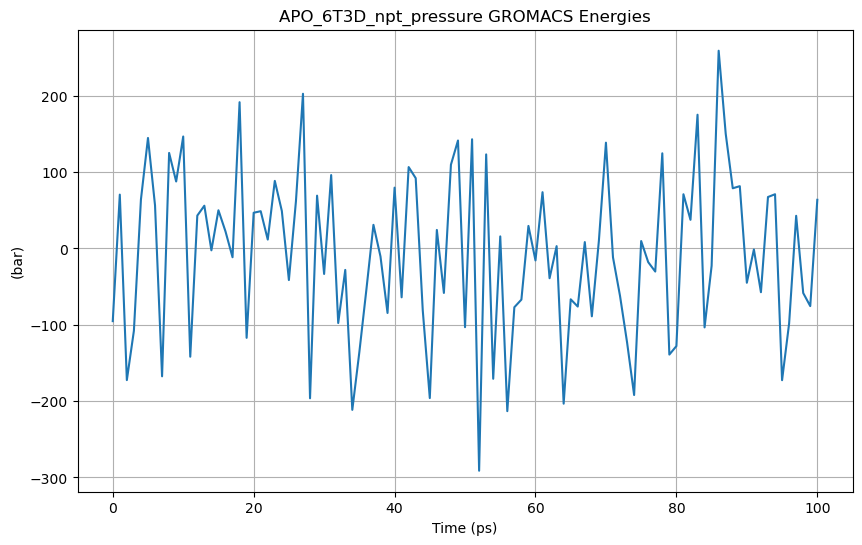

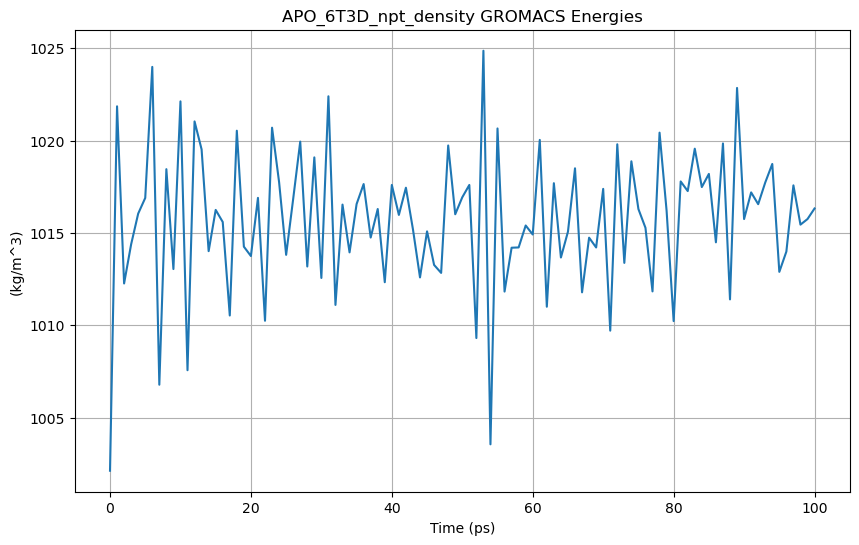

Done with 6T3D


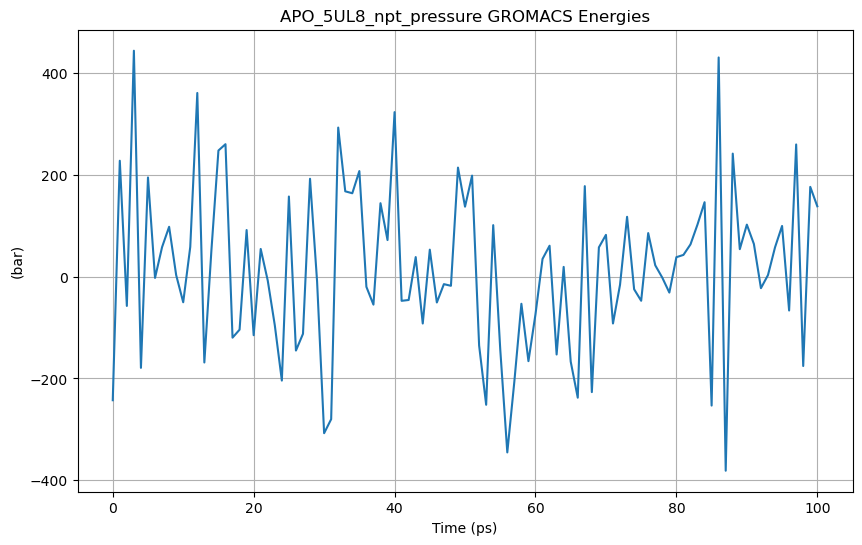

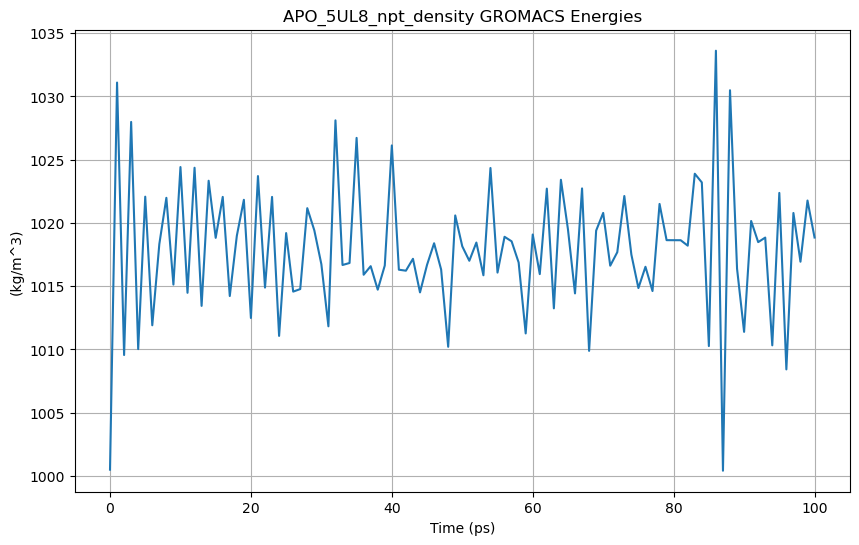

Done with 5UL8


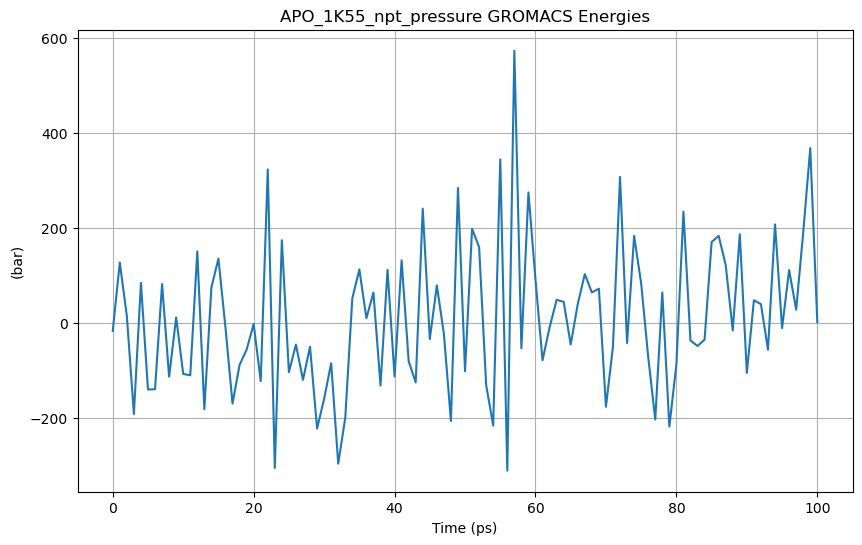

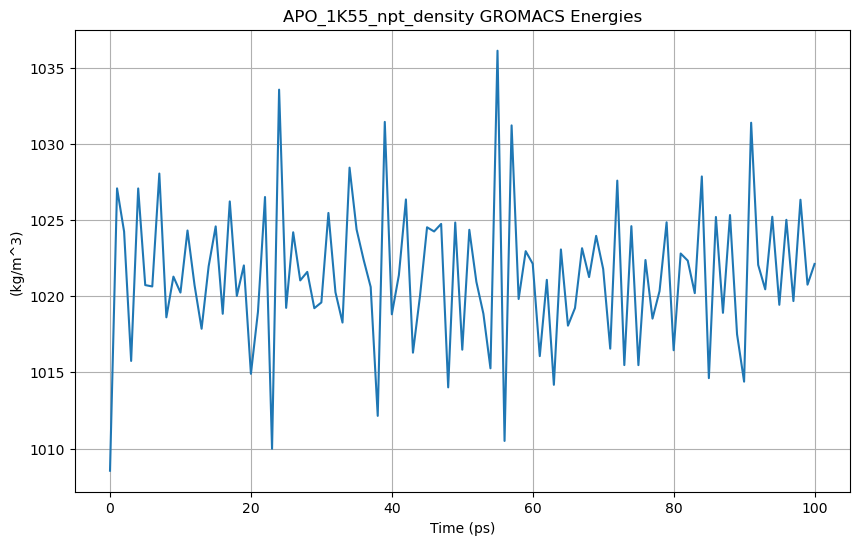

Done with 1K55


In [9]:
#Plot npt equilibration of the apo protein

for pdbcode in structures.PDBID:
    npt_mdp = os.path.join(settings.config, 'npt.mdp')
    topo_path = os.path.join(settings.structures_output, "APO_" + pdbcode+ ".top")

    input_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_nvt.gro")
    tpr_path = os.path.join(settings.structures_output, "APO_" + pdbcode + "_npt.tpr")

    # grompp_command = ["gmx", "grompp", "-f", npt_mdp, "-c", input_path, "-p", topo_path, "-o", tpr_path, "-r", input_path]

    # subprocess.run(grompp_command, check=True)

    # mdrun_command = ["gmx", "mdrun", "-deffnm", tpr_path.replace(".tpr","")]
    # subprocess.run(mdrun_command, check=True)

    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_pressure.xvg")]

    # subprocess.run(energy_command, input="18\n".encode(), check=True)

    # energy_command = ["gmx", "energy", "-f", tpr_path.replace(".tpr",".edr"), "-o", tpr_path.replace(".tpr","_density.xvg")]

    # subprocess.run(energy_command, input="24\n".encode(), check=True)

    plot_xvg(tpr_path.replace(".tpr","_pressure.xvg"))
    plot_xvg(tpr_path.replace(".tpr","_density.xvg"))
    print("Done with " + pdbcode)